In [1]:
from gp_1D_low_res_test import *


In [2]:
input_file = '../training_results/1D_low_res/train_inputs.json'
var_file = '../training_results/1D_low_res/train_reflectivity_var.json'
output_file = '../training_results/1D_low_res/train_reflectivity_mean.json'


In [3]:
gp = LPI_GP_test(input_file = input_file, output_file = output_file, var_file = var_file, train_frac = 0.2)

In [4]:
gp.set_training_data()

In [5]:
gp.optimise_noise_GP()

l =  4.5348785081285845 var =  5.994842503189412


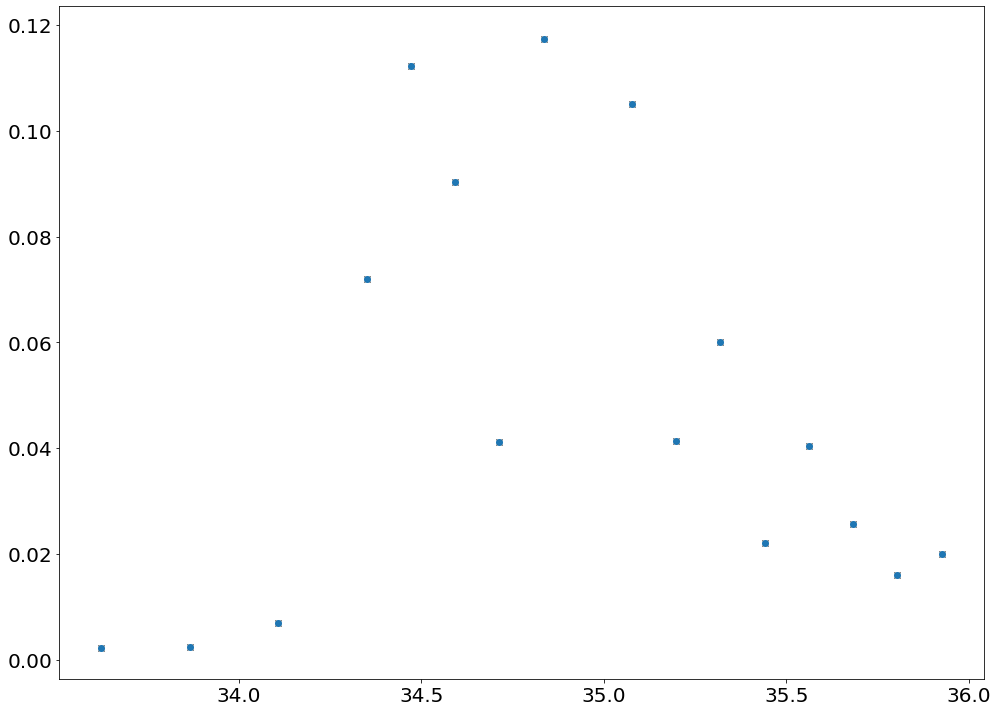

In [6]:
Y_star, err = gp.noise_GP_predict(gp.X_train, get_err = True)
X_s = gp.X_train.flatten()
Y_s = Y_star.flatten()
plt.errorbar(X_s, Y_s, yerr = err.flatten(), fmt="o")
plt.plot(gp.X_train, np.exp(gp.noise_train), 'kx')

In [7]:
gp.optimise_GP()

l =  0.8497534359086445 var =  3.1257158496882367


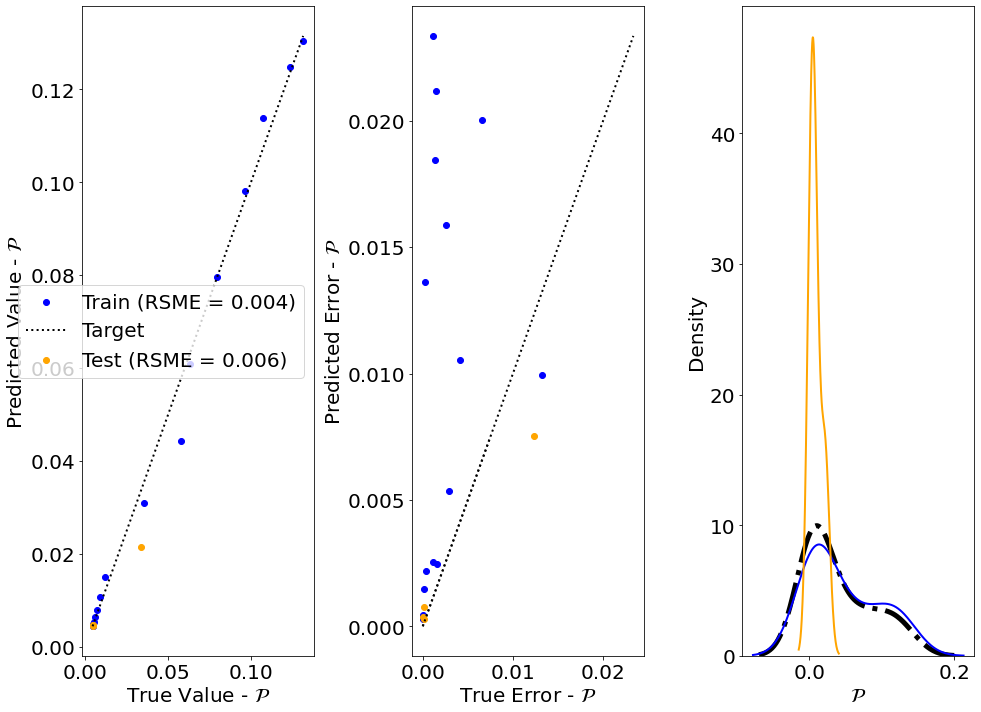

In [8]:
gp.test_train_plot()

In [9]:
X_star = np.geomspace(4e14, 4e15, 100)[:,None]


Y_star, V_epi, V_noise = gp.GP_predict(X_star, get_var=True)

In [10]:
X = np.exp(gp.get_input())
Y = np.exp(gp.get_output())

In [11]:
X_all = np.exp(read_json_file('../training_results/1D_low_res/all_inputs.json'))
Y_all = np.exp(read_json_file('../training_results/1D_low_res/all_reflectivity.json'))


 <ipython-input-12-f7d5b6157de4>:12: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.
 <ipython-input-12-f7d5b6157de4>:13: UserWarning:color is redundantly defined by the 'color' keyword argument and the fmt string "kx" (-> color='k'). The keyword argument will take precedence.


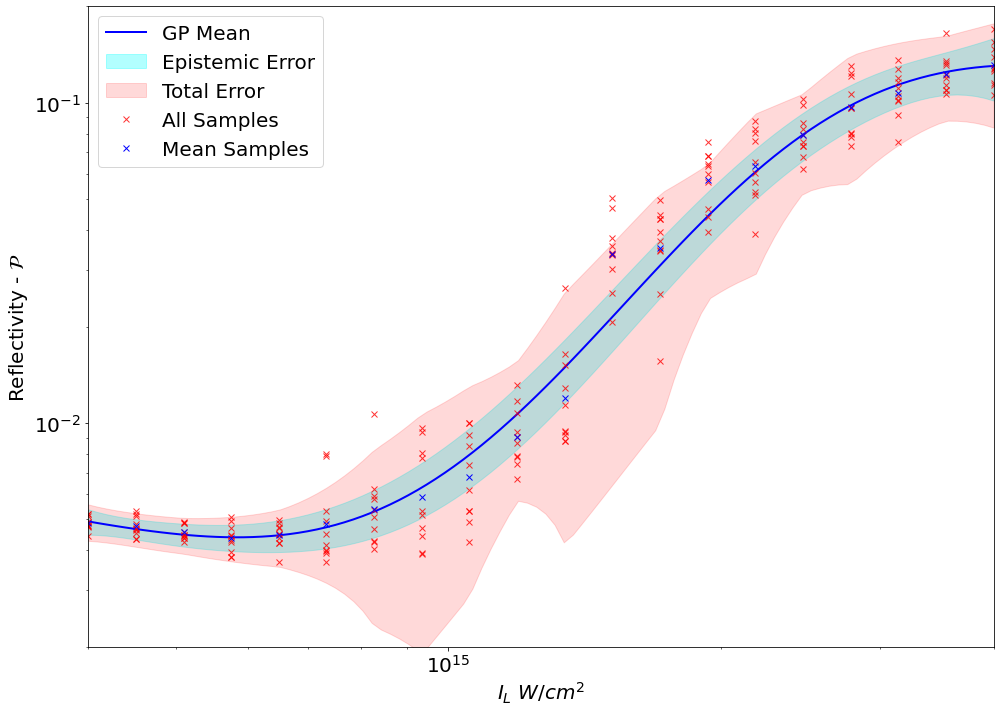

In [12]:
plt.rcParams["figure.figsize"] = [14, 10]

error_epi = 2.0*np.sqrt(V_epi)
error_tot = 2.0*np.sqrt(V_epi + V_noise)

Y_s = Y_star.flatten()
X_s = X_star.flatten()

plt.loglog(X_s, Y_s, color = 'blue', label = 'GP Mean')
plt.fill_between(X_s, (Y_s-error_epi), (Y_s+error_epi), alpha = 0.3, color = 'cyan', label = 'Epistemic Error')
plt.fill_between(X_s, (Y_s-error_tot), (Y_s+error_tot), alpha = 0.15, color = 'red', label = 'Total Error')
plt.plot(X_all, Y_all, 'kx', color = 'red', label = 'All Samples', alpha = 0.8)
plt.plot(X, Y, 'kx', color = 'blue', label = 'Mean Samples')
plt.xlim(4e14, 4e15)
plt.ylim(2e-3, 2e-1)

plt.ylabel(r'Reflectivity - $\mathcal{P}$')
plt.xlabel(r'$I_{L} \,\, W/cm^{2}$')
plt.legend(loc = 0)

In [13]:
print(2*np.sqrt(V_noise[-1]), error_tot[-1])

0.03681350434834262 0.046719178386527706
